# MOUNTAIN CAR

Descripcion detallada de la funcionalidad e implementacion del algoritmo.
Los elementos principales utilizados para su implementacion.

Episodio 500: Recompensa promedio hasta el episodio 500: -997.912
Episodio 1000: Recompensa promedio hasta el episodio 1000: -998.307
Episodio 1500: Recompensa promedio hasta el episodio 1500: -996.9586666666667
Episodio 2000: Recompensa promedio hasta el episodio 2000: -988.2165
Episodio 2500: Recompensa promedio hasta el episodio 2500: -938.2032
Episodio 3000: Recompensa promedio hasta el episodio 3000: -829.001
Episodio 3500: Recompensa promedio hasta el episodio 3500: -748.5965714285715
Episodio 4000: Recompensa promedio hasta el episodio 4000: -685.779
Episodio 4500: Recompensa promedio hasta el episodio 4500: -636.8911111111111
Episodio 5000: Recompensa promedio hasta el episodio 5000: -597.8726


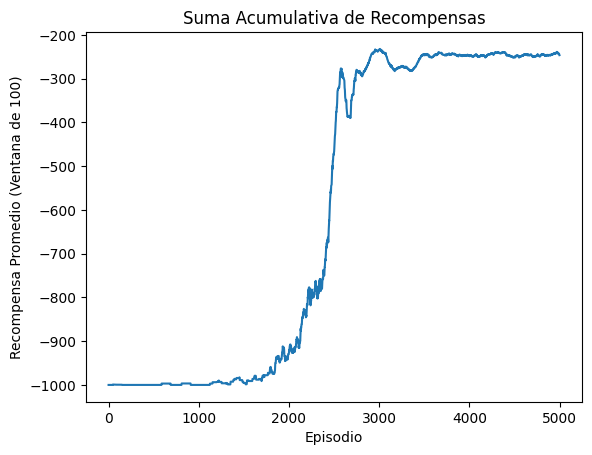

In [21]:
import gymnasium as gym  
import numpy as np  
import matplotlib.pyplot as plt  
import pickle  

def run(episodios, entrenamiento=True, render=False):
    
    env = gym.make('MountainCar-v0', render_mode='human' if render else None) # Crea un entorno MountainCar de Gym 
    
    espacio_posicion = np.linspace(env.observation_space.low[0], env.observation_space.high[0], 20)  # Entre -1.2 y 0.6
    espacio_velocidad = np.linspace(env.observation_space.low[1], env.observation_space.high[1], 20)  # Entre -0.07 y 0.07
    # Divide el espacio de observación en segmentos discretos para la posición y la velocidad.

    if(entrenamiento):
        q = np.zeros((len(espacio_posicion), len(espacio_velocidad), env.action_space.n)) # inicializa tabla q: 20x20x3 
    else:
        f = open('mountain_car.pkl', 'rb')
        q = pickle.load(f)
        f.close()


    tasa_aprendizaje_a = 0.9  # Tasa de aprendizaje (alfa) para Q-learning.
    factor_deescuento_g = 0.9  # Factor de descuento (gamma) para recompensas futuras.

    epsilon = 1  # Valor de exploración inicial (100% de acciones aleatorias).
    tasa_decaimiento_epsilon = 2 / episodios  # Tasa de decaimiento del valor de exploración.
    rng = np.random.default_rng() 

    recompensas_por_episodio = np.zeros(episodios)  # Arreglo para almacenar las recompensas por episodio.

    for i in range(episodios):
        estado = env.reset()[0]  # Reinicia el entorno y obtiene el estado inicial (posición y velocidad).
        estado_p = np.digitize(estado[0], espacio_posicion)  # Convierte la posición en un valor discreto.
        estado_v = np.digitize(estado[1], espacio_velocidad)  # Convierte la velocidad en un valor discreto.
        #Se determina a que segmento pertenecen los valores
        terminado = False  # Indica si se ha alcanzado la meta.

        recompensas = 0  # Inicializa la recompensa acumulada.
        recompensas_por_episodio[i] = recompensas  # Almacena la recompensa del episodio actual.
        
        # Cálculo de la recompensa promedio cada 500 episodios
        if (i + 1) % 500 == 0:
            recompensa_promedio = np.mean(recompensas_por_episodio[:i + 1])
            print(f"Episodio {i + 1}: Recompensa promedio hasta el episodio {i + 1}: {recompensa_promedio}")

        while not terminado and recompensas > -1000:
            if entrenamiento and rng.random() < epsilon:
                accion = env.action_space.sample()  # Elije una acción aleatoria si se está entrenando y con probabilidad epsilon.
            else:
                accion = np.argmax(q[estado_p, estado_v, :])  # Elije la acción con el valor Q más alto.

            nuevo_estado, recompensa, terminado, _, _ = env.step(accion)  # Realiza una acción y obtiene el nuevo estado y recompensa.
            nuevo_estado_p = np.digitize(nuevo_estado[0], espacio_posicion) 
            nuevo_estado_v = np.digitize(nuevo_estado[1], espacio_velocidad)  

            if entrenamiento:
                # Actualiza el valor Q para el estado-acción actual.
                q[estado_p, estado_v, accion] = q[estado_p, estado_v, accion] + tasa_aprendizaje_a * (
                    recompensa + factor_deescuento_g * np.max(q[nuevo_estado_p, nuevo_estado_v, :]) - q[estado_p, estado_v, accion]
                )

            estado = nuevo_estado  # Actualiza el estado actual.
            estado_p = nuevo_estado_p 
            estado_v = nuevo_estado_v  

            recompensas += recompensa  # Acumula la recompensa.

        epsilon = max(epsilon - tasa_decaimiento_epsilon, 0)  # Decrece el valor de exploración con el tiempo.

        recompensas_por_episodio[i] = recompensas  # Almacena la recompensa del episodio actual.

    env.close() 

    if entrenamiento:
        f = open('mountain_car.pkl', 'wb')
        pickle.dump(q, f)  # Guarda la matriz Q en un archivo para uso futuro.
        f.close()
        recompensas_medias = np.zeros(episodios)
        for t in range(episodios):
            recompensas_medias[t] = np.mean(recompensas_por_episodio[max(0, t-100):(t+1)])
        plt.plot(recompensas_medias)
        plt.xlabel("Episodio")
        plt.ylabel("Recompensa Promedio (Ventana de 100)")
        plt.title("Suma Acumulativa de Recompensas")
        plt.savefig(f'mountain_car.png')  

if __name__ == '__main__':
    run(5000, entrenamiento=True, render=False)



In [22]:

# Mostrar un ejemplo de ejecución una vez que esté entrenado
run(5, entrenamiento=False, render=True)